# Applied Data Science Capstone Project - Car accident severity (Week 2)

## The Business Problem 

According to the WHO, every year the lives of approximately 1.35 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury. For children and young adults aged 5-29 years this is the leading cause of death.
Due to the severity of this situation, The2030 Agenda for Sustainable Development has set an ambitious target of halving the global number of deaths and injuries from road traffic crashes by 2020.
By developing an algorithim to predict the severity of an accident given the current weather, road and visibility condition, it will be possible to alert drivers about bad conditions, enabling them and be more careful. Therefore, the frequency of car accidents can be decreased.

## Data

The data collected by the Seattle Police Department and Accident Traffic Records Department from 2004 to present consists of 37 independent variables and 194,673 rows. The variable, “SEVERITYCODE”, classifird the level of severity caused by an accident as:<br> 

1: Property Damage<br>
2: Chance of Injury

In order to prepare the data, a few steps have to be taken. They are: <br>
<ul>
<li>Remove unnecessary columns</li>
<li>Convert Strings into Int</li>
<li>Drop Nan values</li>
<li>Balance the dataset (since the class 1 of variable "SEVERITYCODE" is almost three times the size of the class 2) </li>
</ul>

In [32]:
#Importing the dataset and the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
data = pd.read_csv("Data-Collisions.csv")

/srv/conda/envs/notebook/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


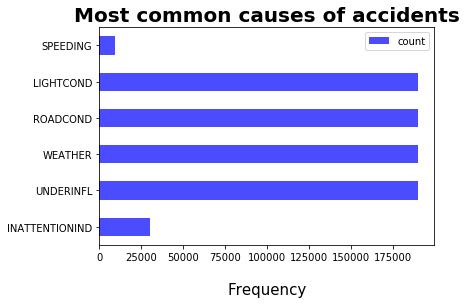

In [33]:
descriptive_stats= data.describe(include="all")

    #Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

descriptive_stats_plot.plot(kind='barh',alpha=0.70,color='blue')
plt.title('Most common causes of accidents', fontsize=20, fontweight='bold')
plt.xlabel("Frequency",fontsize=15,labelpad=20)
plt.show()

In [34]:
#Checking the unnecessary columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [35]:
#removing unnecessary columns
data.drop(columns=["HITPARKEDCAR","CROSSWALKKEY","SEGLANEKEY","ST_COLDESC","ST_COLCODE","SPEEDING","SDOTCOLNUM","PEDROWNOTGRNT","UNDERINFL","INATTENTIONIND","SDOT_COLCODE","SDOT_COLDESC","JUNCTIONTYPE","INCDTTM","INCDATE","VEHCOUNT","X","Y","OBJECTID","INCKEY","COLDETKEY","REPORTNO","STATUS","ADDRTYPE","INTKEY","LOCATION","EXCEPTRSNCODE","EXCEPTRSNDESC","SEVERITYCODE.1","SEVERITYDESC","COLLISIONTYPE","PERSONCOUNT","PEDCOUNT","PEDCYLCOUNT"], inplace=True)

In [36]:
#droping Nan values
data.dropna()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
5,1,Clear,Dry,Daylight
6,1,Raining,Wet,Daylight
7,2,Clear,Dry,Daylight
8,1,Clear,Dry,Daylight
9,2,Clear,Dry,Daylight


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 4 columns):
SEVERITYCODE    194673 non-null int64
WEATHER         189592 non-null object
ROADCOND        189661 non-null object
LIGHTCOND       189503 non-null object
dtypes: int64(1), object(3)
memory usage: 5.9+ MB


In [38]:
#Creating new columns for Weather, Roadcond and Lightcond to replace the names for nunmbers.
data["WEATHERRCODE"] = data["WEATHER"] 
data["WEATHERRCODE"].replace("Clear", 0, inplace=True)
data["WEATHERRCODE"].replace("Raining", 1, inplace=True)
data["WEATHERRCODE"].replace("Overcast", 2, inplace=True)
data["WEATHERRCODE"].replace("Other", 3, inplace=True)
data["WEATHERRCODE"].replace("Snowing", 4, inplace=True)
data["WEATHERRCODE"].replace("Fog/Smog/Smoke", 5, inplace=True)
data["WEATHERRCODE"].replace("Sleet/Hail/Freezing Rain", 6, inplace=True)
data["WEATHERRCODE"].replace("Blowing Sand/Dirt", 7, inplace=True)
data["WEATHERRCODE"].replace("Severe Crosswind", 8, inplace=True)
data["WEATHERRCODE"].replace("Partly Cloudy", 9, inplace=True)
data["WEATHERRCODE"].replace("Unknown", 10, inplace=True)
data.dropna(subset = ["WEATHERRCODE"], inplace=True)
data["WEATHERRCODE"]=data["WEATHERRCODE"].astype(int)
data["WEATHERRCODE"].value_counts()

0     111135
1      33145
2      27714
10     15091
4        907
3        832
5        569
6        113
7         56
8         25
9          5
Name: WEATHERRCODE, dtype: int64

In [39]:
data["ROADCONDCODE"] = data["ROADCOND"] 
data["ROADCONDCODE"].replace("Dry", 0, inplace=True)
data["ROADCONDCODE"].replace("Wet", 1, inplace=True)
data["ROADCONDCODE"].replace("Ice", 2, inplace=True)
data["ROADCONDCODE"].replace("Snow/Slush", 3, inplace=True)
data["ROADCONDCODE"].replace("Other", 8, inplace=True)
data["ROADCONDCODE"].replace("Standing Water", 4, inplace=True)
data["ROADCONDCODE"].replace("Sand/Mud/Dirt", 5, inplace=True)
data["ROADCONDCODE"].replace("Oil", 6, inplace=True)
data["ROADCONDCODE"].replace("Unknown",7, inplace=True)
data.dropna(subset = ["ROADCONDCODE"], inplace=True)
data["ROADCONDCODE"]=data["ROADCONDCODE"].astype(int)
data["ROADCONDCODE"].value_counts()

0    124432
1     47450
7     15068
2      1206
3      1002
8       132
4       115
5        74
6        64
Name: ROADCONDCODE, dtype: int64

In [40]:
data["LIGHTCONDCODE"]= data["LIGHTCOND"] 
data["LIGHTCONDCODE"].replace("Daylight", 0, inplace=True)
data["LIGHTCONDCODE"].replace("Dark - Street Lights On", 1, inplace=True)
data["LIGHTCONDCODE"].replace("Dark - No Street Lights", 2, inplace=True)
data["LIGHTCONDCODE"].replace("Dusk", 3, inplace=True)
data["LIGHTCONDCODE"].replace("Dawn", 4, inplace=True)
data["LIGHTCONDCODE"].replace("Dark - Street Lights Off", 5, inplace=True)
data["LIGHTCONDCODE"].replace("Dark - Unknown Lighting", 6, inplace=True)
data["LIGHTCONDCODE"].replace("Other",7, inplace=True)
data["LIGHTCONDCODE"].replace("Unknown",8, inplace=True)
data.dropna(subset = ["LIGHTCONDCODE"], inplace=True)
data["LIGHTCONDCODE"]=data["LIGHTCONDCODE"].astype(int)
data["LIGHTCONDCODE"].value_counts()

0    116077
1     48440
8     13456
3      5889
4      2502
2      1535
5      1192
7       235
6        11
Name: LIGHTCONDCODE, dtype: int64

In [41]:
#Checking the unbalanced dataset
data["SEVERITYCODE"].value_counts()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

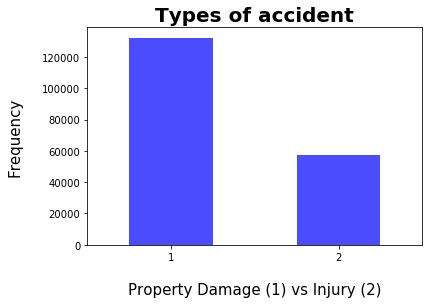

In [42]:
#Checking the types of accident
accidents_stats_plot=data["SEVERITYCODE"].value_counts()
accidents_stats_plot=accidents_stats_plot.transpose()

accidents_stats_plot.plot(kind='bar',alpha=0.70,color='blue')
plt.title('Types of accident', fontsize=20, fontweight='bold')
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xlabel("Property Damage (1) vs Injury (2)",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()

In [43]:
#Balacing dataset
data_max = data[data.SEVERITYCODE==1]
data_min = data[data.SEVERITYCODE==2]

data_maxsample = resample(data_max, replace=False, n_samples=58188, random_state=123)

balanced_data = pd.concat([data_maxsample, data_min])
balanced_data.SEVERITYCODE.value_counts()


1    58188
2    57052
Name: SEVERITYCODE, dtype: int64

In [44]:
#The prepared dataset
data.head(5)

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,WEATHERRCODE,ROADCONDCODE,LIGHTCONDCODE
0,2,Overcast,Wet,Daylight,2,1,0
1,1,Raining,Wet,Dark - Street Lights On,1,1,1
2,1,Overcast,Dry,Daylight,2,0,0
3,1,Clear,Dry,Daylight,0,0,0
4,2,Raining,Wet,Daylight,1,1,0


## Methodology 

The purpose of this project was to build Machine Learning models in order to try to predict car accidents. To do that, Github was used as a repository and Jupyter Notebook was used to preprocess data and build the models using Python and some of its packages, such as Pandas, NumPy and Sklearn.<br>
As shown on the Data Section, after loading data into Pandas Dataframe and checking the feature names and their data types, the most important features to predict the severity of accidents were selected. They are: <br>
<ul>
<li>WEATHER</li>
<li>ROADCOND</li>
<li>LIGHTCOND</li>
</ul>
The next step, also shown on the Data Section, was to balance the target variable "SEVERITYCODE".<br>
<br>
Once the dataset was ready, the following Machine Learning models were built to solve the problem:
<ul>
<li>K-Nearest Neighbour (KNN)</li>
<li>Decision Tree</li>
<li>Logistic Regression</li>
</ul>


In [45]:
#Defining X and Y
X = balanced_data[["WEATHERRCODE","ROADCONDCODE","LIGHTCONDCODE"]]
Y = balanced_data[["SEVERITYCODE"]]

In [46]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=42, stratify=Y, shuffle=True)
print("Train Set:", X_train.shape, y_train.shape)
print("Test Set:", X_test.shape, y_test.shape)

Train Set: (80668, 3) (80668, 1)
Test Set: (34572, 3) (34572, 1)


#### K-Nearest Neighbor (KNN) 

In [47]:
from sklearn.neighbors import KNeighborsClassifier
K=18
kn=KNeighborsClassifier(n_neighbors=K).fit(X_train,y_train)
kyhat=kn.predict(X_test)
kyhat[0:5]

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 1, 1, 2, 1])

#### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

Dec=DecisionTreeClassifier(criterion='entropy',max_depth=7)
Dec.fit(X_train,y_train)

Decyhat=Dec.predict(X_test)
Decyhat[0:5]

array([1, 1, 2, 2, 1])

#### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LogR = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)
LogRyhat=LogR.predict(X_test)
LogRprob=LogR.predict_proba(X_test)
LogRprob

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.51, 0.49],
       [0.48, 0.52],
       [0.44, 0.56],
       ...,
       [0.48, 0.52],
       [0.44, 0.56],
       [0.61, 0.39]])

## Results and Discussion

To see the accuary of the models, the following methods will be used:<br>
<ul>
<li>Jaccard similarity Score </li>
<li>F1 Score</li>
<li>Log Loss (only for Logistic regression)</li>
</ul>

#### K-Nearest Neighbor (KNN) 

In [50]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,kyhat)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5201318986463034

In [51]:
from sklearn.metrics import f1_score
f1_score(y_test,kyhat, average='macro')

0.48287169231072397

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(kyhat, y_test)

0.5201318986463034

Confusion matrix, without normalization
[[13631  3825]
 [12765  4351]]


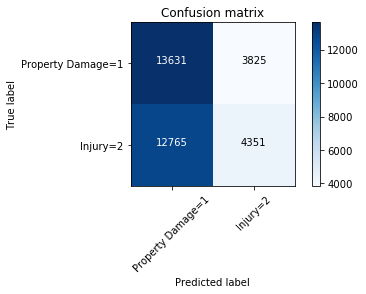

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cnf_matrix = confusion_matrix(y_test, kyhat, labels=[1,2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage=1','Injury=2'],normalize= False,  title='Confusion matrix')

#### Decision Tree

In [54]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,Decyhat)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5542346407497397

In [55]:
from sklearn.metrics import f1_score
f1_score(y_test,Decyhat, average='macro')

0.5301522960764651

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(Decyhat, y_test)

0.5542346407497397

Confusion matrix, without normalization
[[ 5667 11789]
 [ 3622 13494]]


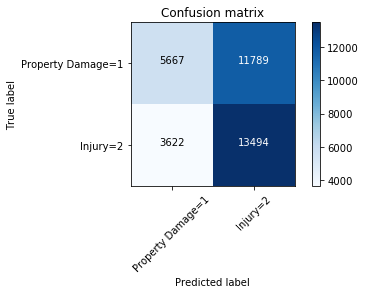

In [57]:
cnf_matrix = confusion_matrix(y_test, Decyhat, labels=[1,2])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage=1','Injury=2'],normalize= False,  title='Confusion matrix')

#### Logistic Regression

In [58]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,LogRyhat)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5458752747888465

In [59]:
from sklearn.metrics import f1_score
f1_score(y_test,LogRyhat, average='macro')

0.5274199323987588

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(LogRyhat, y_test)

0.5458752747888465

Confusion matrix, without normalization
[[ 6020 11436]
 [ 4264 12852]]


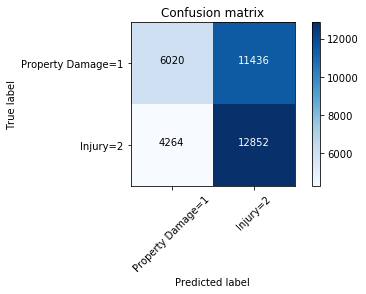

In [61]:
cnf_matrix = confusion_matrix(y_test, LogRyhat, labels=[1,2])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property Damage=1','Injury=2'],normalize= False,  title='Confusion matrix')

## Conclusion

Multiple factors can contribute to the severity of a Car accident. After analysing the Jaccard Score, F1 Score and Accuracy score for the three Machine Learning models developed, it's noticiable that the Decision Tree is the best option. 